In [1]:
import pandas as pd
import numpy as np
import physt
from physt import h1, h2, h3, histogramdd
import matplotlib.pyplot as plt
import dask
import os
import glob
%matplotlib inline

In [ ]:
meteo = pd.read_csv("meteo.csv", delimiter=";")
meteo["timestamp"] = pd.to_datetime(meteo["datum"] + " " + meteo["cas"])
meteo["timestamp_i"] = pd.to_numeric(meteo["timestamp"])
meteo["datum"] = pd.to_datetime(meteo["datum"])
meteo["cas"] = pd.to_datetime(meteo["cas"])

from scipy.interpolate import interp1d
temperature_interp = interp1d(meteo["timestamp_i"], meteo["venkovni_teplota"])

In [ ]:
temperature_ufunc = np.frompyfunc(temperature_interp, 1, 1)

In [3]:
def read_data(path, clean=True):
    data = pd.read_csv(path, delimiter=";", decimal=",", header=None, names=["datetime", "place", "temperature"])
    data["datetime"] = pd.to_datetime(data["datetime"])
    data["id"] = data.place.str.extract("(?<=\\\\)(.*)(?=\\\\)").str.lower()
    data["year"] = data.datetime.dt.year
    data["month"] = data.datetime.dt.month
    data["hour"] = data.datetime.dt.hour
    data["day_of_year"] = data.datetime.dt.dayofyear
    data["day_of_week"] = (data.datetime.dt.dayofweek - 1) % 7 + 1
    data["second_of_day"] = data.datetime.dt.hour * 3600 + data.datetime.dt.minute * 60 + data.datetime.dt.second
    data["timestamp_i"] = pd.to_numeric(data["datetime"])
    # data["temperature
    if clean:
        data = data[(data["temperature"] < 50) & (data["temperature"] > -40)]
    return data

In [4]:
for path in glob.glob("raw_data/*zip"):
    # path = "teplarny/{0}.zip".format(ctvrt)
    ctvrt = os.path.basename(path).split(".")[0]
    print(ctvrt)
    data = read_data(path)
    os.makedirs("data/{0}".format(ctvrt), exist_ok=True)
    from time import time
    t = time()
    for id_ in data.id.unique():
        subdata = data[data.id == id_]
        #subdata["temp_diff"] = subdata["temperature"] - temperature_ufunc(subdata["timestamp_i"]) 
        data_ = np.concatenate([item[:, np.newaxis] for item in [subdata.year, subdata.month, subdata.hour, subdata.temperature]], axis=1)
        h = histogramdd(data_,
                           ("integer", "integer", "fixed_width", "fixed_width"),
                           bin_width=(1, 1, 1, 1),
                           adaptive=True,
                           name=id_,
                           axis_names=["year", "month", "hour", "temperature"])
        h_path = "data/{0}/{1}.json".format(ctvrt, id_)
        h.to_json(path=h_path)        
        #h_diff = histogramdd([subdata.year, subdata.month, subdata.hour, subdata.temp_diff],
                          # ("integer", "integer", "fixed_width", "fixed_width"),
                          # bin_width=(1, 1, 1, 1),
                          # adaptive=True,
                          # name=id_)
        #h_path = "data/{0}/{1}-diff.json".format(ctvrt, id_)
        #h_diff.to_json(path=h_path)            
        print("...", id_)
    print(ctvrt, time() - t, "s")

Bohunice


/home/honza/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


... k11svps1
... k5belstr
... k6molstr
... k8uzbstr
... pdsnem23
... pdsokr30
... zs_armen
... k11svps2
... k11svstr
... k12svps1
... k12svps2
... k12svstr
... k13okstr
... k14okstr
... k15okstr
... k16okstr
... k1ukrstr
... k20sostr
... k21rups1
... k21rustr
... k22nestr
... k23spstr
... k24rostr
... k2ukrstr
... k3ukrstr
... k4lanstr
Bohunice 8.22982120513916 s
Bystrc
... dspvostr
... g_heystr
... k1heyps1
... k1heystr
... k1ondstr
... k2ka_str
... k2valstr
... k3kubstr
... k3vetstr
... k4stostr
... k4vonstr
... k5flestr
... k5lasps1
... k5lasps2
... k5lasps3
... k5lasps4
... k5lasps5
... k5lasstr
... k6opastr
... k7cerstr
... k8cerstr
... kb8fostr
... kb9fostr
... kz1restr
... pdspis06
... pdspis08
... pdspis14
... pdsval02
... pdsval04
... pdsval05
... pdsval06
... pdsval08
... pdsval10
... pdsval11
... pdsval12
... pdsval13
... teychups
... teyhv1ps
... teyhvops
... teykreps
... teynovps
... teyri1ps
... teyri2ps
... teyri3ps
... k10kustr
Bystrc 20.72234344482422 s
Chrlice
... a_p

In [17]:
bb = d[d["id"] == "vsb27str"]

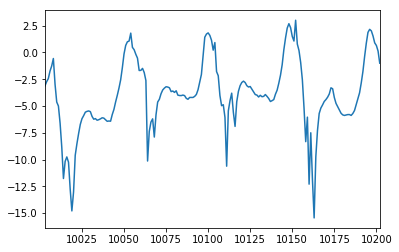

In [23]:
bb["diff"] = bb["temperature_hvezdarna"] - bb["temperature"]

(bb["temperature_hvezdarna"] - bb["temperature"])[10000:10200].plot()